Live points are flat, works better for dead points

Minimising Gaussian t still leads to a misfit. High nk fixes this, why?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.likelihoods import linear, quad, simple, middle, full

In [34]:
def log_shrinkage(logX):
    shifted = np.roll(logX, 1)
    shifted[0] = 0
    return logX - shifted

def logPr_logt(logt, nk):
     logPr_k = np.log(nk) + (nk-1) * logt
     return np.sum(logPr_k)

def logPr_theta(y, likelihood, nk, theta):
    Xest = likelihood.inverse(y, theta)
    logXest = np.log(Xest)
    logtest = log_shrinkage(logXest)
    return logPr_logt(nk, logtest)

def logPr_X(X, nk):
    logt = log_shrinkage(np.log(X))
    return logPr_logt(logt, nk)

In [75]:
nk = nk_dead(nlive=500, ndead=1000)
X = generate_Xs(nk)
logt = log_shrinkage(np.log(X))
theta_true = 10
like = simple
y = like.func(X, theta_true)

### **Include regularisation term**

In [76]:
def logPr_true(y, likelihood, nk, theta):
    Xstar = likelihood.inverse(y, theta)
    logabsfprimes = np.log(abs(likelihood.prime(Xstar, theta)))
    return logPr_X(Xstar, nk) - np.sum(logabsfprimes) 

In [77]:
ds = np.linspace(1, 20, 500)
logprs = np.zeros_like(ds)
for i, d in enumerate(ds):
    logprs[i] = logPr_true(y, like, nk, d)
# plt.plot(ds, logprs)
dmax = ds[np.argmax(logprs)]
dmax

4.845691382765532

In [78]:
Xmax = like.inverse(y, dmax)
logtmax = log_shrinkage(np.log(Xmax))

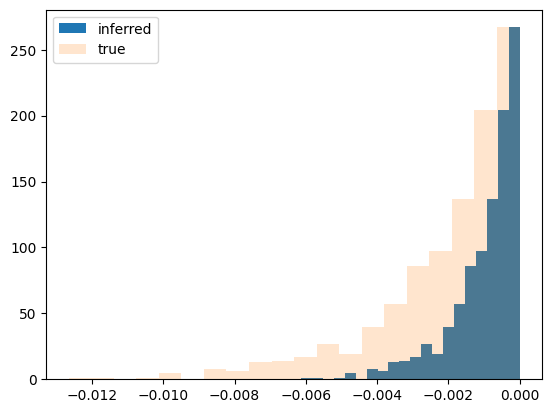

In [83]:
plt.hist(logtmax, bins=20, label='inferred');
plt.hist(logt, bins=20, alpha=0.2, label='true');
plt.legend();